# Imports

In [1]:
import os
from dotenv import load_dotenv
from data_preprocessing.preprocessing import PreProcessing
from data_loading.data_loading import LoadData
from model.vgg16 import VGG16

# Constants

In [2]:
load_dotenv()

HEIGHT = 128
WIDTH = 128

PATH = os.getenv('PATH_TO_DATA')

EPOCHS = 15
VERBOSE = 1
BATCH_SIZE = 16


# Load Data

In [3]:
x, y = LoadData(PATH).load_data()

Saved all image paths.


# Process Data

In [4]:
p = PreProcessing()
x_train, y_train, x_test, y_test = p.split_data(x, y, HEIGHT, WIDTH)

Preprocessing class: 0.
Preprocessing class: 1.
Preprocessing class: 2.
Preprocessing class: 3.
Preprocessing class: 4.
Preprocessing class: 5.
Preprocessing class: 6.
Preprocessing class: 7.
Preprocessing class: 8.
Preprocessing class: 9.


# Build and Train Model

In [5]:
model = VGG16((None, HEIGHT, WIDTH, 3))
model.fit_model(x_train, y_train, EPOCHS, BATCH_SIZE, VERBOSE)

2021-12-03 09:02:20.971332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 09:02:20.998161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 09:02:20.998348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 09:02:20.998708: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)     

2021-12-03 09:02:23.445417: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300
2021-12-03 09:02:23.828653: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1122/1122 [==============================] - 34s 28ms/step - loss: 2.3052 - accuracy: 0.1144
Epoch 2/15
1122/1122 [==============================] - 31s 27ms/step - loss: 1.9942 - accuracy: 0.2264
Epoch 3/15
1122/1122 [==============================] - 29s 26ms/step - loss: 1.6446 - accuracy: 0.3295
Epoch 4/15
1122/1122 [==============================] - 27s 24ms/step - loss: 1.4237 - accuracy: 0.4287
Epoch 5/15
1122/1122 [==============================] - 29s 26ms/step - loss: 1.2103 - accuracy: 0.5209
Epoch 6/15
1122/1122 [==============================] - 28s 25ms/step - loss: 0.9623 - accuracy: 0.6352
Epoch 7/15
1122/1122 [==============================] - 28s 25ms/step - loss: 0.7166 - accuracy: 0.7408
Epoch 8/15
1122/1122 [==============================] - 28s 25ms/step - loss: 0.5186 - accuracy: 0.8217
Epoch 9/15
1122/1122 [==============================] - 27s 24ms/step - loss: 0.4074 - accuracy: 0.8643
Epoch 10/15
1122/1122 [==============================] - 28s 25ms/step - lo

# Evaluate and Predict Model

141/141 [==============================] - 2s 15ms/step - loss: 0.2689 - accuracy: 0.9230
Test lost: 0.2688808739185333 -- Test accuracy: 0.9230082631111145
281/281 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

          c0       0.99      0.78      0.87       497
          c1       0.99      0.93      0.96       453
          c2       0.99      0.83      0.91       463
          c3       0.98      0.95      0.96       469
          c4       0.87      0.98      0.92       465
          c5       0.97      0.99      0.98       462
          c6       0.88      0.96      0.92       465
          c7       0.99      0.92      0.96       400
          c8       0.79      0.94      0.86       382
          c9       0.83      0.96      0.89       425

    accuracy                           0.92      4481
   macro avg       0.93      0.92      0.92      4481
weighted avg       0.93      0.92      0.92      4481



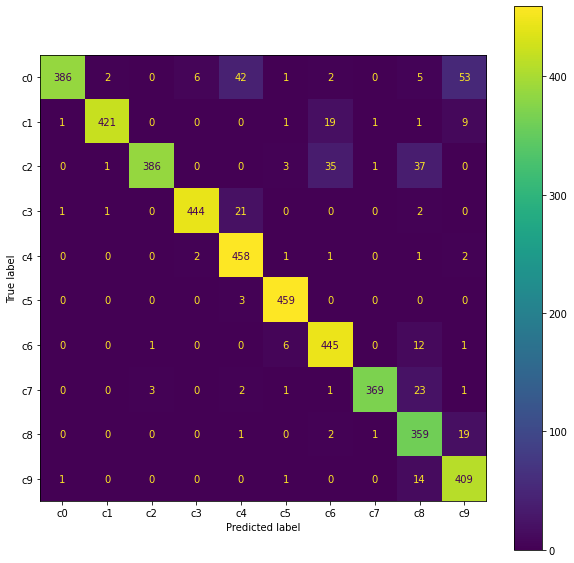

In [10]:
model.evaluate_model(x_test, y_test)
model.predict_model(x_test, y_test, BATCH_SIZE, VERBOSE)